In [24]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

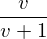

In [25]:
V=z/(1-z)
Z=solve(V-v,z)[0]
Z

In [26]:
N=9
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i))
p

In [27]:
N=9
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i))
q

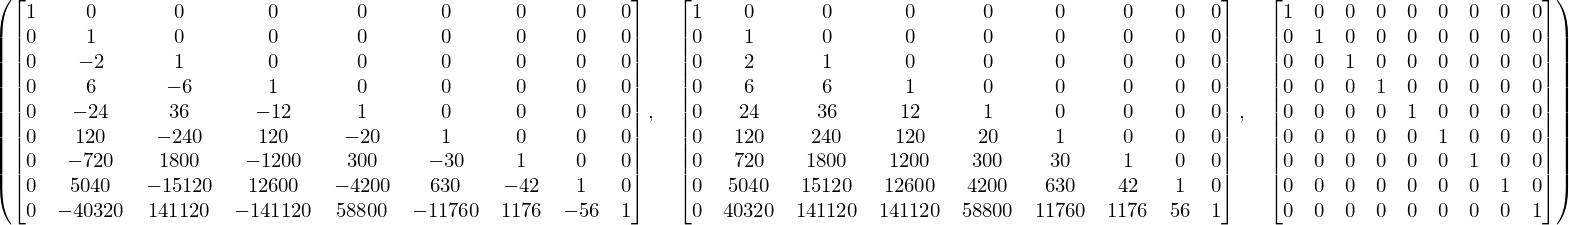

In [28]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF,QCF,simplify(PCF*QCF)

In [29]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True, True]

In [30]:
W=[]
WW=[]
for n in range(N):
    W.append(zeros(N,N))
    WW.append(zeros(N,N))
    for k in range(floor(N/2)):
        for l in range(floor(N/2)):
            W[n][k,l]=sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(W[a]-WW[a]).is_zero for a in range(N)]

[True, True, True, True, True, True, True, True, True]

In [36]:
for i in range(N):
    display([p[i],q[i]])

In [32]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(simplify(g))    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(simplify(g))
    
display(xx)    

In [33]:
display([(sum(binomial(n,k)*gamma(n)/gamma(k)*x**k*(-1)**(n-k) for k in range(1,n+1))-p[n]) for n in range(1,N)])
[(sum(binomial(n,k)*gamma(n)/gamma(k)*y**k for k in range(1,n+1))-q[n]) for n in range(1,N)]

Laguerre polynomials:
$$q_n(y)= n!\,L_n^{(-1)}(-y)=\sum_{k=1}^n {n\choose k}\,\frac{\Gamma(n)}{\Gamma(k)}\,y^k$$

Alternating sign polynomials going from q to p:

$$p_n(x)=(-1)^n\,q_n(-x)$$

In [34]:
L=p
%store L

Stored 'L' (list)


In [37]:
y=""
for n in range(N):
    y=y+"p_{"+latex(n)+ "} = "+latex(p[n])+"\\\\ "
display(Math(y))
%store y > P.tex

y=""
for n in range(N):
    y=y+"q_{"+latex(n)+ "} = "+latex(q[n])+"\\\\ "
display(Math(y))
%store y > Q.tex

<IPython.core.display.Math object>

Writing 'y' (str) to file 'P.tex'.


<IPython.core.display.Math object>

Writing 'y' (str) to file 'Q.tex'.
